# 1) Exploratory Analisys


- Lower displacements increase the MPG
- More cylinders means less MPG
- Modern cars has a best MPG
- High horsepower implies less MPG
- High acceleration could increase MPG
- Less weight, increase the MPG
- Japanese cars has the best MPG and american the worst
- Cylinders and Origin are Categorical Data. They will require feature engineering
- Six registers with missed horsepower

[Dashboard](https://datastudio.google.com/s/oHgAYeSDqM8)

In [77]:
from IPython.display import IFrame
IFrame('https://datastudio.google.com/embed/reporting/e885babe-c7cc-4080-890f-6282fc6835b3/page/kgzxC', width=1200, height=950)

## Six registers was removed for missing information (horsepower)

| MPG | Cylinder | Displacement | Horspower | Weight | Acceleration | Model | Origin | Car_name |
| ----- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 25 | 4 | 98 | ? | 2046 | 19 | 71 | 1 | Ford Pinto |
| 21 | 6 | 200 | ? | 2875 | 17 | 74 | 1 | Ford Maverick |
| 40.9 | 4 | 85 | ? | 1835 | 17.3 | 80 | 2 | Renault Lecar Deluxe |
| 23.6 | 4 | 140 | ? | 2905 | 14.3 | 80 | 1 | Ford Mustang Cobra |
| 34.5 | 4 | 100 | ? | 2320 | 15.8 | 81 | 2 | Renault 18i |
| 23 | 4 | 151 | ? | 3035 | 20.5 | 82 | 1 | AMC Concord DL |


# 2) Resources

In [78]:
import io
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 3) Data Preparation

## Data Charge and verification

In [79]:
data = pd.read_csv('https://gist.githubusercontent.com/YufniCastro/dff968b38a5102606657de8760f67856/raw/8f96f5cb5f7dbb68f6a658b91df47d8d6645b86c/mpg.csv')
data

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,394,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,395,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,396,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,397,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Remove useless columns and correlation

'id' and 'car_name' aren't relevant as input for the model

In [80]:
data = data.drop(columns=['id', 'car_name'])

In [81]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Figure size 576x576 with 0 Axes>

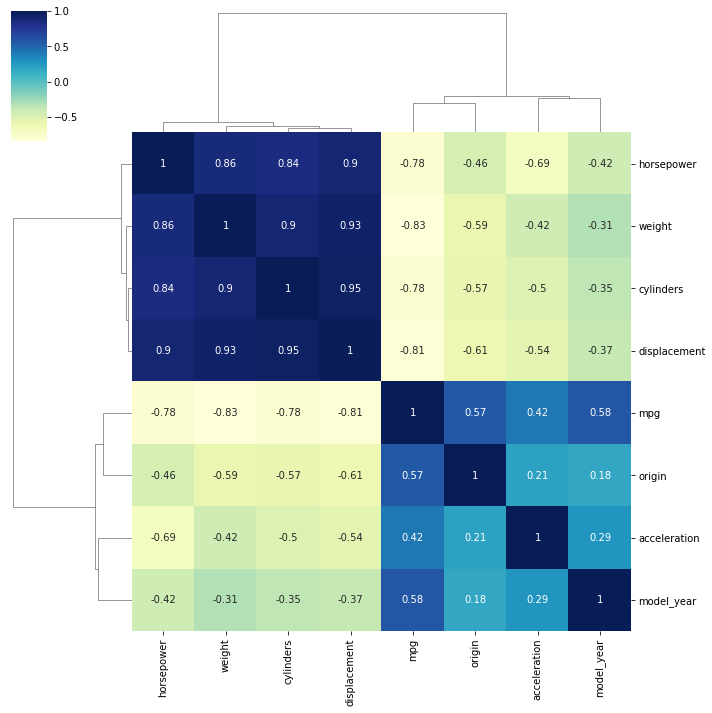

In [82]:
correlation_matrix = data.corr()
plt.figure(figsize = (8, 8))
sns.clustermap(correlation_matrix, annot = True, fmt = '.2g', cmap="YlGnBu")
plt.show()

## Find and remove outliers

Horsepower and acceleration have outliers that could affect the process.

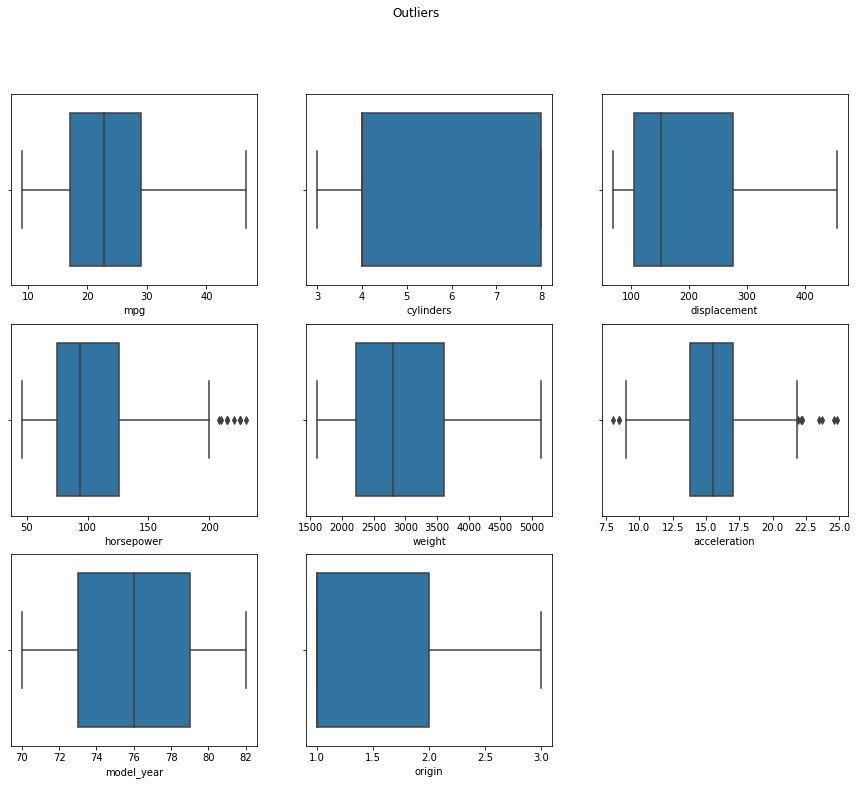

In [83]:
fig = plt.figure(figsize=(15, 12))
fig.suptitle('Outliers')

pos = 1

for column in data.columns:
  fig.add_subplot(3, 3, pos)
  plot = sns.boxplot(x = column, data = data)
  pos += 1

plt.show()

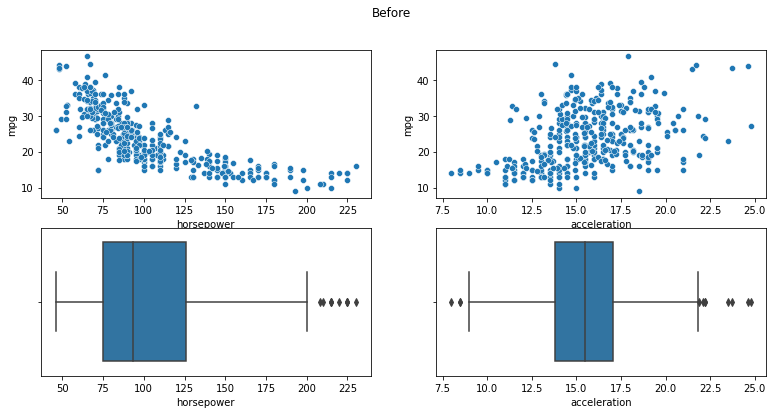

In [84]:
fig = plt.figure(figsize=(13,6))
fig.suptitle('Before')

fig.add_subplot(2, 2, 1)
plot = sns.scatterplot(data=data, x=data['horsepower'], y=data['mpg'])
fig.add_subplot(2, 2, 2)
plot = sns.scatterplot(data=data, x=data['acceleration'], y=data['mpg'])

fig.add_subplot(2, 2, 3)
plot = sns.boxplot(x = data['horsepower'], data = data)
fig.add_subplot(2, 2, 4)
plot = sns.boxplot(x = data['acceleration'], data = data)

plt.show()

old_data = data.copy(deep=True)

### Clean Horsepower

In [85]:
threshold = 1.5

In [86]:
hp_info = data.horsepower.describe()
hp_info

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [87]:
hp_quarter_1 = hp_info[4]
hp_quarter_3 = hp_info[6]

hp_range = hp_quarter_3 - hp_quarter_1
hp_max = hp_quarter_3 + threshold * hp_range
hp_min = hp_quarter_1 - threshold * hp_range

clean_hp_bot = hp_min < data.horsepower
clean_hp_top = data.horsepower < hp_max

clean_hp = clean_hp_bot & clean_hp_top
data = data[clean_hp]

### Clean Acceleration

In [88]:
accel_info = data.horsepower.describe()
accel_quarter_1 = accel_info[4]
accel_quarter_3 = accel_info[6]

accel_range = accel_quarter_3 - accel_quarter_1
accel_max = accel_quarter_3 + threshold * accel_range
accel_min = accel_quarter_1 - threshold * accel_range

clean_accel_bot = accel_min < data.acceleration
clean_accel_top = data.acceleration < accel_max

clean_accel = clean_accel_bot & clean_accel_top
data = data[clean_accel]

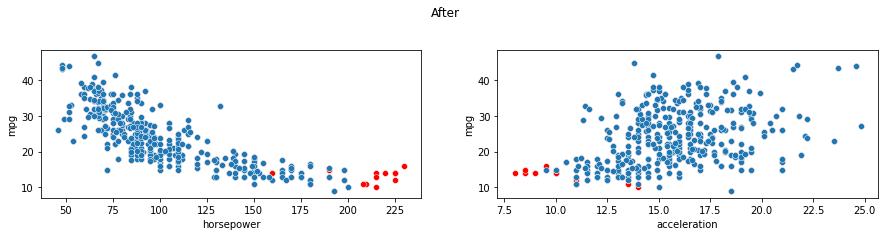

In [89]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('After')

fig.add_subplot(2, 2, 1)
plot = sns.scatterplot(data=old_data, x=old_data['horsepower'], y=old_data['mpg'], color='red')
plot = sns.scatterplot(data=data, x=data['horsepower'], y=data['mpg'])
fig.add_subplot(2, 2, 2)
plot = sns.scatterplot(data=old_data, x=old_data['acceleration'], y=old_data['mpg'], color='red')
plot = sns.scatterplot(data=data, x=data['acceleration'], y=data['mpg'])

plt.show()

Red points are the outliers

## One-Hot Encoding

The one-hot encoding method allows to work with categorical data. Categorical use numbers that represent something but aren't related with their value. For example, origin represent the country when the car was produced, but not necessarily a japanese car will be 3 more faster than an american car.

The method consist in add an independent column for each possible case.

In [90]:
data.cylinders = data.cylinders.astype(str)
data.origin = data.origin.astype(str)

data = pd.get_dummies(data)
data

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,140.0,86,2790,15.6,82,0,1,0,0,0,1,0,0
388,44.0,97.0,52,2130,24.6,82,0,1,0,0,0,0,1,0
389,32.0,135.0,84,2295,11.6,82,0,1,0,0,0,1,0,0
390,28.0,120.0,79,2625,18.6,82,0,1,0,0,0,1,0,0


## Set division

I will use the 80% of available data to train the model. Other 20% will be for testing.

In [91]:
x = data.drop(["mpg"], axis = 1)
y = data.mpg

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

## Standardization

Since the data does not have a normal distribution (Check Outliers section). Standardization provides a better way to do proportional inputs without losing features.

In [92]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4) Model

## Training

In [93]:
model = LinearRegression()
model.fit(x_train, y_train)
y_verification = model.predict(x_test)
mae = mean_absolute_error(y_test, y_verification)
mape = mean_absolute_percentage_error(y_test, y_verification)
mse = mean_squared_error(y_test, y_verification)
r2=r2_score(y_test, y_verification)
print("MAE: ", mae)
print("MAPE: ", mape)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  2.6321045776192165
MAPE:  0.11581012676157056
MSE:  12.228818374179827
R2:  0.8011605762467994


## User interaction

In [94]:
test_label = [x for x in y_test] # list to compare real value with predict value

def model_prediction(selection: int):
  prediction_value = model.predict(np.array(x_test[selection]).reshape(1,-1))[0]
  real_value = test_label[selection]
  return [prediction_value, real_value]

def custom_prediction(displacement: float, horsepower: int, weight: int, acceleration: float, model_year: int, cylinders: int, origin: int):
  cylinders_3, cylinders_4, cylinders_5, cylinders_6, cylinders_8 = 0, 0, 0, 0, 0
  if cylinders == 3:
    cylinders_3 = 1
  elif cylinders == 4:
    cylinders_4 = 1
  elif cylinders == 5:
    cylinders_5 = 1
  elif cylinders == 6:
    cylinders_6 = 1
  elif cylinders == 8:
    cylinders_8 = 1
  
  origin_1, origin_2, origin_3 = 0, 0, 0,
  if origin == 1:
    origin_1 = 1
  elif origin == 2:
    origin_2 = 1
  elif origin == 3:
    origin_3 = 1

  entry_data = [displacement, horsepower, weight, acceleration, model_year, cylinders_3, cylinders_4, cylinders_5, cylinders_6, cylinders_8, origin_1, origin_2, origin_3]
  
  entry_data = scaler.transform(np.array(entry_data).reshape(1,-1))

  c_prediction_value = model.predict(entry_data)[0]
  return c_prediction_value

# 5) Use

## Select an example from test data.

In [95]:
selection = 40 #select an example in test dataset [0 to 75]

result = model_prediction(selection)

print('Predicted MPG: ', result[0])
print('Real MPG: ', result[1])

Predicted MPG:  20.374932571992566
Real MPG:  20.5


## Or write your own values


In [96]:
# Write your custom values
displacement = 300 #float
horsepower = 160 #int
weight = 200 #int
acceleration = 15 #float
model_year = 72 #int between 70 and 82 for fiable results
cylinders = 4 #int can be 3, 4, 5, 6 or 8
origin = 3 #int 1 = american, 2 = european, 3 = japanese

custom_result = custom_prediction(displacement, horsepower, weight, acceleration, model_year, cylinders, origin)

print('Predicted MPG: ', custom_result)

Predicted MPG:  37.268934308072176


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
